# ***Developing an Advanced YOLOv5 Object Detection Model to Detect Computer Peripherals in Video Footage, with Tracking Algorithm and Edge Detection Integration***

##Preliminary instructions:

Before running this code, ensure you have uploaded the zipped train, test, and validation datasets to your Google Drive, as well as the overall yolov5_dir zip file. After uploading, you need to unzip them using the provided unzipping code. Additionally, you should delete the original zip files manually after extraction.

# **# Step 1: Setting up YOLOv5, and then zipping local files. [DO NOT RUN, for show only]**

This step was previously used to set up the YOLOv5 repository from GitHub, and the following module was for zipping the YOLOv5 directory, along with with dataset folders.

However, this code is no longer needed, as we are using my pre-saved and zipped YOLOv5 archive and dataset folders. This code remains for reference only.

In [ ]:
# Step 1: Set up YOLOv5 OBSOLETE
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install dependencies

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
#Zipping code OBSOLETE: I used this to zip my google drive dataset folders and then download them.
import shutil
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')

# Input paths to the folders
#train_folder = '/content/drive/MyDrive/split_dataset/train'
#val_folder = '/content/drive/MyDrive/split_dataset/val'
#test_folder = '/content/drive/MyDrive/split_dataset/test'
yolov5_dir = '/content/yolov5'

# Output zip file paths
#train_zip_path = '/content/drive/MyDrive/split_dataset/train.zip'
#val_zip_path = '/content/drive/MyDrive/split_dataset/val.zip'
#test_zip_path = '/content/drive/MyDrive/split_dataset/test.zip'
yolov5_dir_path = '/content/yolov5_dir'

# Zipping the folders
#shutil.make_archive(train_zip_path.replace('.zip', ''), 'zip', train_folder)
#shutil.make_archive(val_zip_path.replace('.zip', ''), 'zip', val_folder)
#shutil.make_archive(test_zip_path.replace('.zip', ''), 'zip', test_folder)
shutil.make_archive(yolov5_dir_path.replace('.zip', ''), 'zip', yolov5_dir)

# Download the zip files
#files.download(train_zip_path)
#files.download(val_zip_path)
#files.download(test_zip_path)
files.download(yolov5_dir)


# **# Step 2: Unzip the Datset and YOLOv5 files**

Run this section to unzip the uploaded dataset files (train, test, val) into their respective directories, as well as the yolov5_dir model directory file. **Ensure that the dataset and yolov5 files have been uploaded before running this step.**

In [ ]:
# Step 2: Unzip files
import os
import zipfile

# Define the paths to the zip files
zip_files = {
     "yolov5": "/content/yolov5_dir.zip",
     "test": "/content/test.zip",
     "train": "/content/train.zip",
     "val": "/content/val.zip"
 }

# Function to unzip a file to a specified directory
def unzip_file(zip_path, extract_to):
     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
         zip_ref.extractall(extract_to)
     print(f"Unzipped {zip_path} to {extract_to}")

 # Unzip each dataset
for dataset, zip_path in zip_files.items():
     extract_to = os.path.join("/content", dataset)
     os.makedirs(extract_to, exist_ok=True)  # Ensure the directory exists
     unzip_file(zip_path, extract_to)


Unzipped /content/test.zip to /content/test
Unzipped /content/train.zip to /content/train
Unzipped /content/val.zip to /content/val


# **# Step 2.5: Install Dependencies**

This step ensures that the necessary dependencies for YOLOv5 are installed. The script navigates to the YOLOv5 directory and installs all of the required Python packages. **Do NOT restart the runtime if requested, not doing so will not break the code, but doing so will mean you haveto reupload all of the zip files.**

In [ ]:
#Step 2.5 Install YOLOv5 dependencies
%cd yolov5
!pip install -r requirements.txt  # Install dependencies

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


# **# Step 3: Verify the dataset directories**

Here, the code checks whether the required directories for the train, val, and test datasets (images and labels) are correctly set up and exist in the environment, and defines paths for each of them for later use.


In [ ]:
# Step 3: Make dataset paths
# Define dataset paths for unzipped files
train_images = '/content/train/images'
train_labels = '/content/train/labels'
val_images = '/content/val/images'
val_labels = '/content/val/labels'
test_images = '/content/test/images'
test_labels = '/content/test/labels'

#Ensure the directories exist
import os

for path in [train_images, train_labels, val_images, val_labels, test_images, test_labels]:
    if not os.path.exists(path):
        print(f"Directory {path} does not exist.")


# **# Step 4: Creating a unified dataset .yaml file**

This step creates a dataset configuration file (custom_data.yaml), which is essential for YOLOv5 training. It points to the dataset directories and defines the number of classes involved (the 4 which are outlined in the dataset combination file: headset, mouse, keyboard, and PC).

*Custom class weights were also eventually assigned, to give more importance to underperforming classes, such as headsets, during training.*

In [ ]:
#Step 4, create a unified data.yaml file that points to the unified directories

# Create data configuration file
data_yaml_content = f"""
train: {train_images}
val: {val_images}
test: {test_images}

nc: 4
names: ['headset', 'mouse', 'keyboard', 'PC']

# Assign higher weights to 'headset' and 'keyboard'
cls_weights: [1.1, 1.0, 1.1, 1.0]
"""

with open('/content/yolov5/data/custom_data.yaml', 'w') as f:
    f.write(data_yaml_content)

print("Data configuration file created successfully.")

Data configuration file created successfully.


# **# Step 5: Implementing the CBAM file**
## *Do NOT run, this is already implemented in the YOLOv5 directory zip file you have previously uploaded*

This code does not need to be run, but has been included for reference purposes.

Here, the Convolutional Block Attention Module (CBAM), a key component of the custom YOLOv5 model, is defined. The module improves the model's feature extraction by applying both spatial and channel attention mechanisms, the importance of this is discussed in more detail in the report. The code then saves the custom module to the YOLOv5 directory.



In [ ]:
#Step 5 - Write CBAM file
%%writefile /content/yolov5/models/cbam.py
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicConv(nn.Module):
    def __init__(self, in_planes, out_planes, kernel_size, stride=1, padding=0, dilation=1, relu=True):
        super(BasicConv, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size, stride=stride,
                              padding=padding, dilation=dilation, bias=False)
        self.bn = nn.BatchNorm2d(out_planes, eps=1e-5, momentum=0.01, affine=True)
        self.relu = nn.ReLU(inplace=True) if relu else None

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        if self.relu:
            x = self.relu(x)
        return x

class ChannelGate(nn.Module):
    def __init__(self, gate_channels, reduction_ratio=16, pool_types=['avg', 'max']):
        super(ChannelGate, self).__init__()
        self.gate_channels = gate_channels
        self.mlp = nn.Sequential(
            nn.Linear(gate_channels, gate_channels // reduction_ratio),
            nn.ReLU(),
            nn.Linear(gate_channels // reduction_ratio, gate_channels)
        )
        self.pool_types = pool_types

    def forward(self, x):
        channel_att_sum = None
        for pool_type in self.pool_types:
            if pool_type == 'avg':
                avg_pool = F.avg_pool2d(x, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp(avg_pool.view(avg_pool.size(0), -1))
            elif pool_type == 'max':
                max_pool = F.max_pool2d(x, (x.size(2), x.size(3)), stride=(x.size(2), x.size(3)))
                channel_att_raw = self.mlp(max_pool.view(max_pool.size(0), -1))
            if channel_att_sum is None:
                channel_att_sum = channel_att_raw
            else:
                channel_att_sum = channel_att_sum + channel_att_raw

        scale = torch.sigmoid(channel_att_sum).unsqueeze(2).unsqueeze(3).expand_as(x)
        return x * scale

class ChannelPool(nn.Module):
    def forward(self, x):
        return torch.cat((torch.max(x, 1)[0].unsqueeze(1), torch.mean(x, 1).unsqueeze(1)), dim=1)

class SpatialGate(nn.Module):
    def __init__(self):
        super(SpatialGate, self).__init__()
        kernel_size = 7
        self.compress = ChannelPool()
        self.spatial = BasicConv(2, 1, kernel_size, stride=1, padding=(kernel_size-1)//2, relu=False)

    def forward(self, x):
        x_compress = self.compress(x)
        scale = torch.sigmoid(self.spatial(x_compress))
        return x * scale

class CBAM(nn.Module):
    def __init__(self, gate_channels, reduction_ratio=16, pool_types=['avg', 'max'], no_spatial=False):
        super(CBAM, self).__init__()
        self.ChannelGate = ChannelGate(gate_channels, reduction_ratio, pool_types)
        self.no_spatial = no_spatial
        if not self.no_spatial:
            self.SpatialGate = SpatialGate()

    def forward(self, x):
        x_out = self.ChannelGate(x)
        if not self.no_spatial:
            x_out = self.SpatialGate(x_out)
        return x_out


Writing /content/yolov5/models/cbam.py


# **# Step 6: Backup and read common.py, where CBAM is placed.**
## *Do NOT run, this is already implemented in the YOLOv5 directory zip file you have previously uploaded*

This code does not need to be run, but has been included for reference purposes.

In this step, the common.py file, containing the key elements of the YOLOv5 model architecture (eventually including CBAM), is backed up. This ensures that I can debug in the eventuality that CBAM causes errors, and changes can be reverted if needed.


In [ ]:
#Step 6 - Backup and read content of common.py file just in case

# Read the content of common.py
common_py_path = '/content/yolov5/models/common.py'
with open(common_py_path, 'r') as file:
    common_py_content = file.read()

# Create a backup of common.py
backup_common_py_path = '/content/yolov5/models/common.py.bak'
with open(backup_common_py_path, 'w') as file:
    file.write(common_py_content)

print("Backup of common.py created at /content/yolov5/models/common.py.bak")

Backup of common.py created at /content/yolov5/models/common.py.bak


# **# Step 7: Modify common.py to add CBAM**
## *Do NOT run, this is already implemented in the YOLOv5 directory zip file you have previously uploaded*

This code does not need to be run, but has been included for reference purposes.

This section modifies the YOLOv5 architecture by instering the CBAM module into the common.py file. The code directly modifies the existing C3 class, discussed further in the project report, to include attention mechanisms, enhancing the model's ability to detect subtle features in images/frames.


In [ ]:
# Step 7 - add CBAM module directly to the common.py file
common_py_path =  '/content/yolov5/models/common.py'

with open(common_py_path, 'r') as file:
    common_py_content = file.read()

# Modify common.py to include the CBAM module
common_py_content = common_py_content.replace(
    "class C3(nn.Module):",
    "from models.cbam import CBAM\n\nclass C3(nn.Module):"
)

c3_class_start = common_py_content.find("class C3(nn.Module):")
c3_class_end = common_py_content.find("def forward(self, x):", c3_class_start) + len("def forward(self, x):")
c3_class_body = common_py_content[c3_class_start:c3_class_end]

c3_class_body = c3_class_body.replace(
    "self.cv3 = Conv(2 * c_, c2, 1)",  # Optional shortcut
    "self.cv3 = Conv(2 * c_, c2, 1)\n        self.cbam = CBAM(c2)"
)
c3_class_body = c3_class_body.replace(
    "return self.cv3(torch.cat((self.m(self.cv1(x)), self.cv2(x)), 1))",
    "y1 = self.cv1(x)\n        y2 = self.cv2(x)\n        y = torch.cat((self.m(y1), y2), 1)\n        y = self.cv3(y)\n        return self.cbam(y)"
)

common_py_content = common_py_content[:c3_class_start] + c3_class_body + common_py_content[c3_class_end:]

with open(common_py_path, 'w') as file:
    file.write(common_py_content)

print("common.py has been modified to include the CBAM module.")

common.py has been modified to include the CBAM module.


# **# Step 8: Implementing the CBAM file**
## *OPTIONAL TO RUN: this is already implemented in the YOLOv5 directory zip file you have previously uploaded*

This code does not need to be run, as I have already included a best.pt file at yolov5/runs/weights/best.pt

This best.pt file was trained for 50 epochs at the pre-set model parameters featured below. It is included so that you can test the SAM edge detection and Norfair tracking faster.

However, if you wish to run the training to verify the code works, please note that the best results seem to be around 50 epochs, but 15 is best if you are working quickly.

A brief description of this step is that it initiates the training process for the custom YOLOv5 model. The training is based on the custom combined dataset, and the key parameters are specified (more information on these choices can be found in the project report). The model will automatically train for 50 epochs, reduce for faster training if you're running on a schedule.

If you choose to run the training, the model parameters will be saved as a .pkl file for later use. This is not strictly necessary as we have the model as a zip archive, but I wanted to include this to show that it was considered.





In [ ]:
# # Step 8: Train the YOLOv5 model
import torch


# Define training parameters
from yolov5 import train
train.run(data='/content/yolov5/data/custom_data.yaml',  # path to the dataset config file
           imgsz=640,  # image size
           batch_size=16,  # batch size
           epochs=50,  # number of epochs
           optimizer='SGD',  # optimizer, SGD may be better
           lr0=0.002,  # initial learning rate
           weights='/content/yolov5/runs/weights/best.pt')  # use yolov5s.pt if best.pt is unavailable

 # Save model parameters
import pickle

model_parameters = {
     'data': '/content/yolov5/data/custom_data.yaml',
     'imgsz': 640,
     'batch_size': 16,
     'epochs': 50,
     'weights': '/content/yolov5/runs/weights/best.pt',
     'optimizer': str(torch.optim.SGD),
     'lr0': 0.002,
     'device': str(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
 }

with open('model_parameters.pkl', 'wb') as f:
     pickle.dump(model_parameters, f)

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      30/49      4.59G    0.03425    0.01758   0.007078         51        640:  14%|█▍        | 17/123 [00:03<00:23,  4.53it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      4.59G    0.03461    0.01809   0.007552         56        640:  15%|█▍        | 18/123 [00:03<00:22,  4.63it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      4.59G     0.0345    0.01809   0.007362         49        640:  15%|█▌        | 19/123 [00:04<00:22,  4.66it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead

# Preliminary instructions before Inference, Edge Detection, and Tracking:

## Upload the SetupVideo.mp4 video before running these steps.

Note: the debugging code has been included below for reference, but is not necessary to run. It lists the files in the current directory, whichw as necessary when I was zipping the saved YOLOv5 archive for use in this project.

In [ ]:
#Debugging code, listing the files in the current directory before downloading the YOLOv5 zip file to be used in the project.
!ls

benchmarks.py	 data	     LICENSE	     README.zh-CN.md   train.py
CITATION.cff	 detect.py   models	     requirements.txt  tutorial.ipynb
classify	 export.py   pyproject.toml  runs	       utils
CONTRIBUTING.md  hubconf.py  README.md	     segment	       val.py


# **# Step 9: Load the Trained YOLOv5 Model**

In this step, the trained YOLOv5 model is loaded using thr custom weights from the training process. This model, once loaded, can be used for running inference, tracking, and edge detection.

Double check the path to the model weights (best.pt) is correct if you have chosen to run the training again. If you ran training again, the path will instead be: /content/yolov5/runs/exp/weights/best.pt

In [ ]:
# Step 9: Model loading code before running detection and Norfair and SAM algorithms
import torch

# Define the path to the YOLOv5 directory
yolov5_dir = '/content/yolov5'

# Load the model from the local repository
det_model = torch.hub.load(
    yolov5_dir,
    'custom',
    path='/content/yolov5/runs/weights/best.pt', #if you run training again, the path should be /content/yolov5/runs/exp/weights/best.pt
    source='local',
    force_reload=True
)


YOLOv5 🚀 v7.0-365-g12b577c8 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 245 layers, 7118677 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


# **# Step 10: Running Inference on an MP4 Video**

Here, the trained custom YOLOv5 model is run on an input video file (SetupVideo.mp4). Ensure that the video is uploaded to the local environment, and verify that the path is correct before running this step. The model will process the video and then save the output video to the Colab environment.

Note: The output video from this code can be manually downloaded, but I have also included example output videos in the project zip file for your ease of access.

Double check the path to the model weights (best.pt) is correct if you have chosen to run the training again. If you ran training again, and did not use my included best.pt file, the path will instead be: /content/yolov5/runs/exp/weights/best.pt

In [ ]:
# Step 10: Run inference on an mp4 video
import locale
import detect
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# !pip install opencv-python-headless  # Install OpenCV if not already installed
detect.run(source='/content/SetupVideo.mp4',  # Path to the input video
           weights='/content/yolov5/runs/weights/best.pt') # Change to current run if needed

YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 245 layers, 7118677 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 29.9ms
video 1/1 (2/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.6ms
video 1/1 (3/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.6ms
video 1/1 (4/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.6ms
video 1/1 (5/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.6ms
video 1/1 (6/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.6ms
video 1/1 (7/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.6ms
video 1/1 (8/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 8.8ms
video 1/1 (9/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.5ms
video 1/1 (10/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.6ms
video 1/1 (11/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.5ms
video 1/1 (12/1258) /content/SetupVideo.mp4: 384x640 2 PCs, 7.5ms
video 1/1 (13/1258) /content/SetupVi

# **# Step 11: Perform Edge Detection Using SAM (Segment Anything Model)**

This step integrates the Segment Anything Model (SAM) for edge detection and segmentation. For each detected object, the code applies SAM to generate segmentation masksbefore overlaying them on the video. This adds an aesthetic and functional improvement by highlighting object boundaries.

Note, there are two sections of SAM code. Step 11 displays a single frame output following the code, while step 12 generates an output video which is saved to the Colab environment and can be manually downloaded. (Though this output video has also been included in the project zip file).

Double check the path to the model weights (best.pt) is correct if you have chosen to run the training again. If you ran training again, and did not use my included best.pt file, the path will instead be: /content/yolov5/runs/exp/weights/best.pt

/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded



0: 1024x1024 679.5ms
Speed: 6.0ms preprocess, 679.5ms inference, 8.5ms postprocess per image at shape (1, 3, 1024, 1024)
(1080, 1920)
(543, 933)


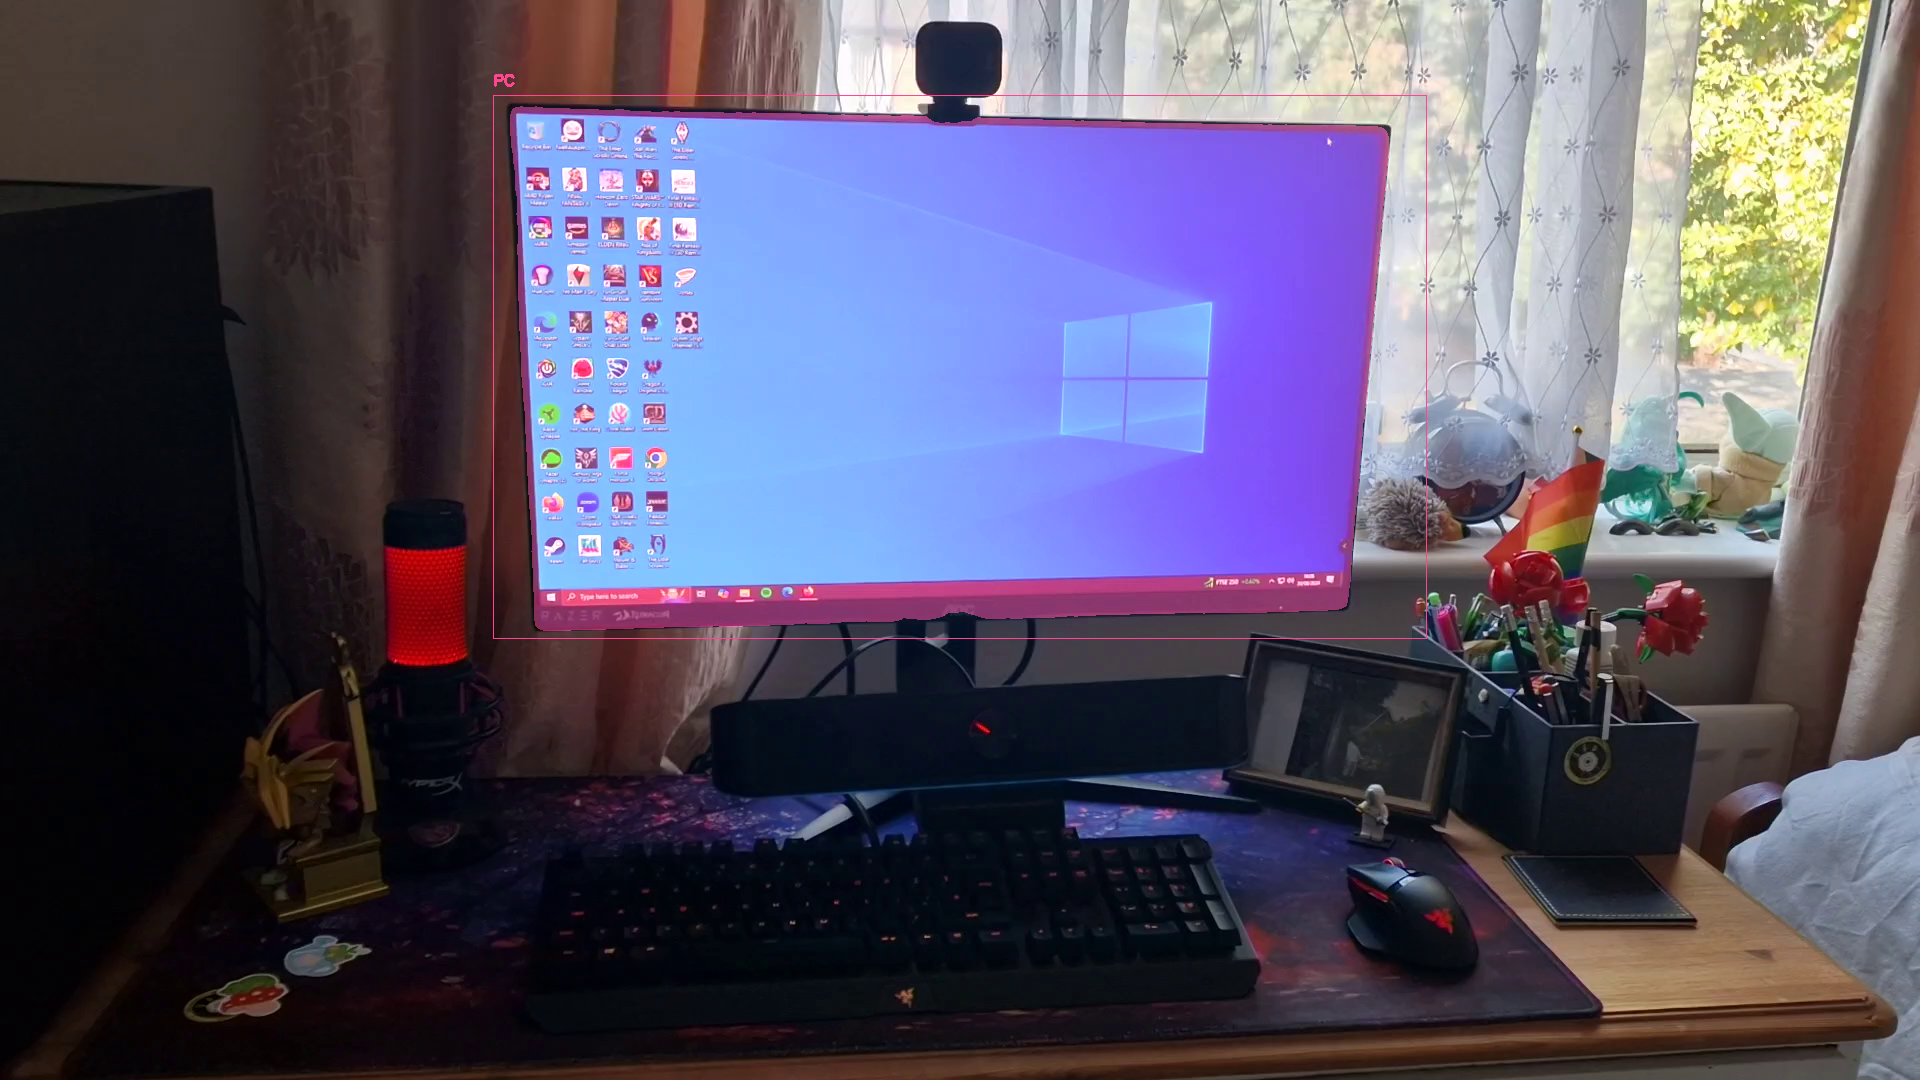

In [ ]:
#Step 11: Run edge detection
from ultralytics import YOLO, SAM
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize SAM model and detection model
sam_model = SAM('sam2_b.pt')

# Load and process the video
video_path = '/content/SetupVideo.mp4'
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB and then to PIL image
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_pil = Image.fromarray(frame_rgb)

    # Perform object detection
    detection_results = det_model(frame_pil)
    detection_results_df = detection_results.pandas().xyxy[0]

    for _, row in detection_results_df.iterrows():
        bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
        label = row['name']

        x1, y1, x2, y2 = map(int, bbox)
        roi = frame[y1:y2, x1:x2]
        roi_pil = Image.fromarray(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

        # Perform segmentation
        segmentation_results = sam_model(frame_pil, bboxes=[(x1, y1, x2, y2)])

        for result in segmentation_results:
            mask = result.masks.data.cpu().numpy().astype(np.uint8)[0]  # Extract the mask
            print(mask.shape)

            mask_resized = cv2.resize(mask, (x2 - x1, y2 - y1), interpolation=cv2.INTER_NEAREST)
            print(mask_resized.shape)

            # Create a mask overlay with the same dimensions as the ROI
            mask_overlay = np.zeros_like(frame)
            mask_overlay[mask == 1] = [145, 70, 255]  # Color the mask Twitch Purple

            # Overlay the mask on the ROI
            roi_with_mask = cv2.addWeighted(frame, 1.0, mask_overlay, 0.5, 0)

            # Place the masked ROI back into the frame
            frame = roi_with_mask

            # Draw bounding box and label on the original frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (145, 70, 255), 0)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (145, 70, 255), 2)

    # Display the frame with mask overlay
    frame_rgb_display = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2_imshow(frame)
    break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# **# Step 12: Process Video for SAM Segmentation with Output**

Here, the previous SAM segmentation process is expanded to save the processed video with segmentation masks overlaid by iterating over the video frame by frame.

This step ensures that the segmented video is saved as an output video file. You can modify the output file paths as you need.

Double check the path to the model weights (best.pt) is correct if you have chosen to run the training again. If you ran training again, and did not use my included best.pt file, the path will instead be: /content/yolov5/runs/exp/weights/best.pt

In [ ]:
# Step 12: Run edge detection
from ultralytics import SAM
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Initialize SAM model
sam_model = SAM('sam2_b.pt')  # Replace with your SAM 2 model path

# Load and process the video
video_path = '/content/SetupVideo.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties to save output video
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter('/content/OutputVideo.mp4', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to a format suitable for YOLOv5 model (BGR -> RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform object detection with YOLOv5 model
    # YOLOv5 expects a NumPy array in RGB format, so we pass frame_rgb directly
    detection_results = det_model(frame_rgb)
    detection_results_df = detection_results.pandas().xyxy[0]

    if not detection_results_df.empty:
        for _, row in detection_results_df.iterrows():
            bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
            label = row['name']

            x1, y1, x2, y2 = map(int, bbox)
            roi = frame[y1:y2, x1:x2]
            roi_pil = Image.fromarray(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

            # Perform segmentation
            segmentation_results = sam_model(frame_rgb, bboxes=[(x1, y1, x2, y2)])

            for result in segmentation_results:
                # Extract the mask
                mask = result.masks.data.cpu().numpy().astype(np.uint8)[0]

                # Resize mask to exactly fit the bounding box dimensions
                mask_resized = cv2.resize(mask, (x2 - x1, y2 - y1), interpolation=cv2.INTER_LINEAR)  # Use INTER_LINEAR for better resizing

                # Create a mask overlay with the same dimensions as the frame
                mask_overlay = np.zeros_like(frame)

                # Adjust the mask overlay for correct alignment
                mask_overlay[y1:y2, x1:x2][mask_resized == 2] = [145, 70, 255]  # Color the mask Twitch Purple

                # Overlay the mask on the ROI with adjusted blending
                frame = cv2.addWeighted(frame, 1.0, mask_overlay, 0.5, 0)

                # Draw bounding box and label on the original frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), (145, 70, 255), 1)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (145, 70, 255), 2)


    # Write the processed frame to the output video
    out.write(frame)

    # Display the frame (optional, for debugging)
    # frame_rgb_display = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 308.3ms
Speed: 6.4ms preprocess, 308.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.7ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 6.0ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 5.9ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.2ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.0ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.1ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 6.2ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 5.7ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 5.9ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 5.9ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.3ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.2ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.1ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.1ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 6.3ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.1ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.8ms
Speed: 5.7ms preprocess, 268.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.0ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 5.6ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 5.6ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 6.2ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 5.9ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.6ms
Speed: 9.2ms preprocess, 267.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 6.3ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 6.1ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 7.1ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.5ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 6.2ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 6.2ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.1ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 6.0ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.1ms
Speed: 5.8ms preprocess, 268.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 6.5ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 6.3ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.4ms
Speed: 6.0ms preprocess, 268.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.0ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.8ms
Speed: 5.8ms preprocess, 268.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 5.9ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.9ms
Speed: 6.2ms preprocess, 266.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 5.7ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.9ms
Speed: 6.0ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.3ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.9ms
Speed: 6.2ms preprocess, 268.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 284.4ms
Speed: 6.3ms preprocess, 284.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 284.6ms
Speed: 6.0ms preprocess, 284.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 5.9ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 270.1ms
Speed: 6.1ms preprocess, 270.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.2ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 6.3ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 5.9ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 5.9ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 6.5ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 270.1ms
Speed: 6.3ms preprocess, 270.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 6.3ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.1ms
Speed: 6.1ms preprocess, 268.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 270.6ms
Speed: 6.1ms preprocess, 270.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 6.8ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.1ms
Speed: 6.0ms preprocess, 269.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 270.1ms
Speed: 6.1ms preprocess, 270.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.0ms
Speed: 6.5ms preprocess, 268.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 271.4ms
Speed: 6.2ms preprocess, 271.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.5ms
Speed: 6.4ms preprocess, 269.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 272.4ms
Speed: 6.3ms preprocess, 272.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.6ms
Speed: 6.1ms preprocess, 268.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 6.1ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 5.7ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 6.4ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 5.9ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 271.2ms
Speed: 6.0ms preprocess, 271.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 6.1ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.4ms
Speed: 6.1ms preprocess, 268.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.8ms
Speed: 6.5ms preprocess, 267.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.9ms
Speed: 6.6ms preprocess, 267.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.8ms
Speed: 5.8ms preprocess, 268.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 6.3ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.9ms
Speed: 6.1ms preprocess, 266.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 274.0ms
Speed: 6.2ms preprocess, 274.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 8.6ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 271.1ms
Speed: 6.1ms preprocess, 271.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 271.3ms
Speed: 8.3ms preprocess, 271.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 271.8ms
Speed: 6.7ms preprocess, 271.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.3ms
Speed: 6.1ms preprocess, 267.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.9ms
Speed: 6.0ms preprocess, 266.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.1ms
Speed: 6.0ms preprocess, 269.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 5.9ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.2ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.6ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 6.2ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.0ms
Speed: 6.0ms preprocess, 269.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.8ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 6.4ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 5.9ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 5.9ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 5.9ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.5ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.9ms
Speed: 6.0ms preprocess, 268.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.3ms
Speed: 6.3ms preprocess, 268.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 271.6ms
Speed: 6.8ms preprocess, 271.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 270.6ms
Speed: 6.3ms preprocess, 270.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.2ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.4ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.1ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 5.7ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 270.2ms
Speed: 5.9ms preprocess, 270.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 5.7ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 6.1ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 5.7ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.1ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 5.8ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.8ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.1ms
Speed: 5.7ms preprocess, 269.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.4ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.0ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 6.3ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.0ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.4ms
Speed: 6.8ms preprocess, 267.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.4ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.1ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 5.7ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 5.7ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 6.3ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 5.9ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.6ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.5ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.1ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 5.8ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.1ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 5.7ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 5.9ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.8ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 6.0ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.5ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.2ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 5.9ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.1ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.8ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.4ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 6.0ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 6.7ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.0ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 6.4ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 6.5ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.7ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 6.5ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.7ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.0ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 5.7ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.8ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.0ms
Speed: 5.9ms preprocess, 260.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.6ms
Speed: 5.7ms preprocess, 258.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.5ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.4ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.7ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.5ms
Speed: 5.9ms preprocess, 258.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.4ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 5.8ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.0ms
Speed: 5.8ms preprocess, 259.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.9ms
Speed: 6.1ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.7ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.7ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.7ms
Speed: 6.4ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.7ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 5.7ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.8ms
Speed: 6.8ms preprocess, 259.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 6.4ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.7ms
Speed: 6.8ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 6.5ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 5.8ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 6.1ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 6.0ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 260.8ms
Speed: 6.2ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.4ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 5.8ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 6.0ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.4ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 7.0ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.8ms
Speed: 6.4ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.9ms
Speed: 5.9ms preprocess, 259.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 259.7ms
Speed: 6.3ms preprocess, 259.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 7.2ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.1ms
Speed: 6.2ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.6ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.0ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 260.2ms
Speed: 6.1ms preprocess, 260.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 5.6ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.4ms
Speed: 6.6ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.1ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.8ms
Speed: 7.2ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 6.1ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 259.5ms
Speed: 6.1ms preprocess, 259.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.2ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 6.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.2ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.7ms
Speed: 6.0ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.5ms
Speed: 6.2ms preprocess, 258.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.8ms
Speed: 6.5ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.8ms
Speed: 6.0ms preprocess, 259.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.9ms
Speed: 5.9ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 7.1ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.8ms
Speed: 6.0ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 6.2ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.0ms
Speed: 5.8ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 7.2ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.4ms
Speed: 6.0ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.3ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.4ms
Speed: 6.4ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.3ms
Speed: 6.4ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.4ms
Speed: 5.9ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.5ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 6.9ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.1ms
Speed: 6.9ms preprocess, 259.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.5ms
Speed: 6.1ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.1ms
Speed: 6.4ms preprocess, 258.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.3ms
Speed: 6.2ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.1ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 260.3ms
Speed: 6.0ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.2ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.2ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.1ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.2ms
Speed: 6.1ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.7ms
Speed: 6.0ms preprocess, 259.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.7ms
Speed: 6.0ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.6ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.1ms
Speed: 6.2ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 6.4ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.2ms
Speed: 6.2ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 5.9ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.7ms
Speed: 5.9ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.0ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.9ms
Speed: 5.6ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.0ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 6.3ms preprocess, 260.4ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.4ms
Speed: 6.2ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.2ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 6.4ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.1ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.6ms
Speed: 6.2ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.0ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.2ms
Speed: 6.3ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.4ms
Speed: 5.6ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.1ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.3ms
Speed: 6.7ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.9ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.1ms
Speed: 6.8ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.5ms
Speed: 6.3ms preprocess, 259.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.8ms
Speed: 7.3ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 6.0ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 7.6ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 5.8ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.4ms
Speed: 5.8ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.3ms
Speed: 6.0ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.5ms
Speed: 7.2ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 6.0ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 7.7ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.2ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 6.0ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.0ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.7ms
Speed: 6.0ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 6.1ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 6.3ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.4ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.8ms
Speed: 6.1ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 6.3ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.9ms
Speed: 6.0ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.8ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.0ms
Speed: 5.8ms preprocess, 267.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.7ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.5ms
Speed: 5.9ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 260.9ms
Speed: 7.2ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.3ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.8ms
Speed: 7.2ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.2ms
Speed: 5.8ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 6.1ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.2ms
Speed: 6.2ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.3ms
Speed: 6.1ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.6ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.7ms
Speed: 5.8ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.6ms
Speed: 6.1ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 6.1ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.7ms
Speed: 6.5ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.1ms
Speed: 5.6ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.0ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.1ms
Speed: 7.1ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 7.8ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 7.6ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.7ms
Speed: 7.3ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.4ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.1ms
Speed: 5.8ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.1ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.8ms
Speed: 6.9ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.2ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 6.1ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.7ms
Speed: 7.8ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.8ms
Speed: 6.4ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.6ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.8ms
Speed: 6.3ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 6.3ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.9ms
Speed: 7.6ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 5.7ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.5ms
Speed: 5.9ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 5.9ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.8ms
Speed: 6.5ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 7.0ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.4ms
Speed: 5.8ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 7.1ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.5ms
Speed: 5.9ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.0ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.0ms
Speed: 7.1ms preprocess, 266.0ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.8ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.0ms
Speed: 6.7ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.7ms
Speed: 7.2ms preprocess, 268.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.1ms
Speed: 6.3ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.3ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.9ms
Speed: 6.3ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.9ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 6.2ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 8.0ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.8ms
Speed: 5.6ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.4ms
Speed: 6.3ms preprocess, 267.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.1ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 7.2ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.2ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.6ms
Speed: 5.9ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.5ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 6.7ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.1ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.5ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 7.6ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 6.0ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.1ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.4ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.3ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.0ms
Speed: 6.0ms preprocess, 268.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.4ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.0ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.3ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.2ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 6.2ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 6.1ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.1ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 6.1ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.4ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 6.1ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.6ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 7.4ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.7ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 6.0ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.1ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.2ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 5.9ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.5ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.6ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.8ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.1ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 6.2ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.1ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.1ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 5.9ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 6.1ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.1ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.0ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 5.9ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.7ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.8ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 7.6ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.2ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.3ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 6.3ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 5.8ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.6ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.8ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.6ms
Speed: 7.7ms preprocess, 267.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.1ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 6.6ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.6ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 6.2ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.2ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.7ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 6.2ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.5ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 5.8ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 6.2ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 6.2ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 5.9ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.2ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.5ms
Speed: 6.4ms preprocess, 259.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.3ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.8ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.8ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 5.8ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.4ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 7.0ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.2ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 6.1ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.9ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 6.1ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 5.7ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.0ms
Speed: 6.1ms preprocess, 260.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 6.0ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.2ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 7.5ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.0ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 6.2ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 7.2ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 6.1ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.1ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 7.9ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.6ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 7.8ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.5ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 6.5ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 7.1ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 6.0ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 6.3ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.2ms
Speed: 6.4ms preprocess, 260.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.8ms
Speed: 5.8ms preprocess, 259.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 5.9ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.1ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 5.9ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 7.0ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 5.9ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.0ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 7.3ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 5.9ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.3ms
Speed: 6.2ms preprocess, 259.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.5ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 5.9ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 5.9ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 6.9ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 7.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 6.0ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 7.8ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.1ms
Speed: 6.6ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.4ms
Speed: 5.7ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.4ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.9ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.3ms
Speed: 6.1ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.7ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.5ms
Speed: 5.9ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 7.1ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 7.6ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 7.9ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 8.3ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 5.9ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.2ms
Speed: 6.2ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.2ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.0ms
Speed: 6.0ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.1ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.2ms
Speed: 8.0ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 7.8ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.5ms
Speed: 6.5ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 5.8ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.8ms
Speed: 6.2ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.1ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 6.1ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.1ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.3ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.9ms
Speed: 6.3ms preprocess, 259.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 6.0ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.6ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.2ms
Speed: 6.1ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.2ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 6.1ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 7.7ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.8ms
Speed: 6.4ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.5ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.6ms
Speed: 8.5ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.2ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 6.1ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.8ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.9ms
Speed: 7.9ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 5.8ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.5ms
Speed: 7.6ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.4ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 270.4ms
Speed: 5.8ms preprocess, 270.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.5ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.5ms
Speed: 6.2ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 6.2ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.0ms
Speed: 6.2ms preprocess, 267.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.1ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.4ms
Speed: 7.2ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.2ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.0ms
Speed: 6.0ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 5.8ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.5ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.3ms
Speed: 7.8ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 5.8ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.5ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.0ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.3ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.6ms
Speed: 5.8ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 8.0ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 5.6ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 8.0ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 7.8ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.4ms
Speed: 6.1ms preprocess, 259.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 5.9ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 8.3ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.0ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 6.1ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 6.1ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 7.2ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.1ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 6.8ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 8.0ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.4ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.0ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 7.9ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.1ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 6.9ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 8.3ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 6.4ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.0ms
Speed: 6.6ms preprocess, 260.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 7.3ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 7.8ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.0ms
Speed: 6.6ms preprocess, 267.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 6.4ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.9ms
Speed: 5.6ms preprocess, 267.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 6.2ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.8ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 5.9ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 7.5ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.6ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 6.1ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 6.0ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.7ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.1ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.5ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 5.7ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 7.2ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.4ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.0ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.0ms
Speed: 5.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 7.6ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.2ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.2ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 5.7ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.0ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 5.8ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.1ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 5.9ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 7.8ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 5.8ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.2ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.2ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.0ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.0ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.4ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 7.4ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 5.9ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.1ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.8ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 7.7ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 5.9ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 5.9ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.3ms
Speed: 6.3ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 8.1ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 6.5ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 5.9ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.4ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.2ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 6.2ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.2ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 5.9ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.6ms
Speed: 7.0ms preprocess, 267.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 7.3ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 6.3ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.7ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 5.8ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 5.9ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 6.9ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 7.8ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.3ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.8ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.3ms
Speed: 7.5ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.3ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.1ms
Speed: 8.9ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.9ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 5.8ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 5.8ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 6.4ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.2ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 5.9ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 8.3ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 6.7ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 8.5ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 6.5ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.1ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.9ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.7ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 5.9ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.9ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 5.6ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.4ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 7.0ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.7ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 7.1ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 5.9ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 5.7ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.4ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.0ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 6.1ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 5.9ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 5.8ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.6ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.9ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.8ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 5.9ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.2ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 5.9ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 5.9ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.0ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 8.9ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.9ms
Speed: 6.0ms preprocess, 268.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.6ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 5.6ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.8ms
Speed: 7.9ms preprocess, 258.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.1ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.0ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.3ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 7.9ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.4ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 6.0ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 7.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.1ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 5.7ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.5ms
Speed: 6.4ms preprocess, 259.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 5.8ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.3ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.1ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.6ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.4ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 7.0ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.1ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 7.1ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.8ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 5.8ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 6.2ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.3ms
Speed: 7.4ms preprocess, 269.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.6ms
Speed: 5.7ms preprocess, 258.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.5ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 7.2ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 8.3ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.6ms
Speed: 5.7ms preprocess, 267.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.4ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.3ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.4ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.0ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 6.1ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 7.9ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.8ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 5.8ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.7ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 6.4ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 7.7ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 7.5ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 8.1ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.5ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 5.7ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.9ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.8ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 7.4ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 7.3ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 7.4ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.2ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.5ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 7.2ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 5.8ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 7.1ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.6ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 8.5ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.1ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 7.7ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 5.8ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.1ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 7.3ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.3ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 5.8ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 7.9ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.6ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.7ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 6.1ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 6.0ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 5.9ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 6.3ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.3ms
Speed: 6.0ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.3ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 5.8ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.6ms
Speed: 5.8ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.9ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.1ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.3ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 6.0ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.0ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 6.2ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)


/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: Fu

/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 5.9ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 8.0ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 7.0ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: Fu

0: 1024x1024 268.3ms
Speed: 7.3ms preprocess, 268.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.4ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 8.0ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 8.1ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.3ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.2ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 5.9ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 7.9ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.9ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.9ms
Speed: 8.6ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.2ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.7ms
Speed: 5.9ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 7.9ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.3ms
Speed: 7.9ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 5.8ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.3ms
Speed: 7.2ms preprocess, 267.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 7.2ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.0ms
Speed: 9.3ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 7.9ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 6.5ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.2ms
Speed: 9.1ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 7.5ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.4ms
Speed: 6.1ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.8ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 6.5ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.1ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.8ms
Speed: 9.0ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 8.2ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 6.5ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.7ms
Speed: 6.2ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 8.3ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.9ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 6.0ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.1ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 6.6ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.7ms
Speed: 6.3ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.6ms
Speed: 6.6ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.0ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 6.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.8ms
Speed: 5.7ms preprocess, 267.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 5.8ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.4ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 6.7ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.1ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 6.0ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 6.3ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.1ms
Speed: 6.0ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 5.6ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 6.6ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 6.3ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 6.2ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.1ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.0ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.0ms
Speed: 6.0ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.7ms
Speed: 6.0ms preprocess, 268.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.6ms
Speed: 6.4ms preprocess, 267.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.0ms
Speed: 8.3ms preprocess, 269.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 8.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 6.6ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 7.7ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 7.7ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.2ms
Speed: 8.4ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.3ms
Speed: 7.6ms preprocess, 267.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.3ms
Speed: 6.3ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 5.6ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 6.2ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.0ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.0ms
Speed: 6.2ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 5.9ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.1ms
Speed: 6.4ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 6.0ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.2ms
Speed: 5.6ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.9ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.1ms
Speed: 6.1ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 7.2ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.8ms
Speed: 6.3ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 7.5ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.4ms
Speed: 6.1ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 5.9ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 8.6ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 5.8ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 5.9ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 5.8ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 7.6ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.5ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.4ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)


/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: Fu

/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.4ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.8ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 5.9ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.3ms
Speed: 6.9ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.3ms
Speed: 5.7ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.4ms
Speed: 5.9ms preprocess, 268.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 7.9ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.6ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.1ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.2ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 6.0ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 6.1ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.3ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.9ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 6.4ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 5.7ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 5.8ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.9ms
Speed: 8.1ms preprocess, 259.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.8ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.1ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.2ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 7.0ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 6.1ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 7.3ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 6.5ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 5.8ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 5.6ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 5.8ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 5.9ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 5.7ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 5.9ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 7.4ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 7.4ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.7ms
Speed: 6.0ms preprocess, 267.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 5.9ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 5.9ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.4ms preprocess, 262.4ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 7.9ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.3ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.2ms
Speed: 6.0ms preprocess, 260.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.9ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.3ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.2ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 8.0ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 7.7ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 8.3ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.1ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 7.7ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 5.8ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 5.8ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 5.8ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 6.3ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.6ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 5.9ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.7ms
Speed: 6.0ms preprocess, 259.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.0ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.4ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.1ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 7.3ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 7.1ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.8ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 6.0ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 6.2ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 5.8ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 6.7ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 5.9ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.8ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.5ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.6ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.4ms
Speed: 6.4ms preprocess, 259.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.1ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 5.7ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 5.7ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 7.6ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 5.8ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 6.2ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.0ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.7ms
Speed: 8.1ms preprocess, 268.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 5.7ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.7ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.4ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.9ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.8ms
Speed: 6.1ms preprocess, 259.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 5.8ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.8ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.9ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 5.9ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 5.6ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.7ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 7.7ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 7.6ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.3ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.3ms
Speed: 6.9ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 7.1ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 5.8ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.8ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 6.0ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 6.3ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.2ms
Speed: 5.8ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 8.9ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.1ms
Speed: 6.3ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.4ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.5ms
Speed: 6.3ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.0ms
Speed: 6.2ms preprocess, 267.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.2ms
Speed: 6.7ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 6.9ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 8.0ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 8.3ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.3ms
Speed: 6.1ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.9ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.8ms
Speed: 9.0ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 5.9ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 6.1ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.1ms
Speed: 6.3ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.5ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.2ms
Speed: 9.0ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 5.9ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.1ms
Speed: 5.9ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 8.4ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.0ms
Speed: 6.3ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.7ms
Speed: 6.5ms preprocess, 267.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.3ms
Speed: 6.1ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.0ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 6.5ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 8.0ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.5ms
Speed: 6.9ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.2ms
Speed: 8.5ms preprocess, 259.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 7.6ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 5.6ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 7.3ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 6.1ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 5.8ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 7.5ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 6.2ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 5.9ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.7ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 7.0ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 5.9ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 6.1ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 5.8ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.1ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 5.9ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.7ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 5.8ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.6ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 6.1ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 5.6ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.9ms
Speed: 5.7ms preprocess, 259.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.3ms
Speed: 8.3ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 8.5ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 5.8ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.3ms
Speed: 5.6ms preprocess, 268.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.7ms
Speed: 8.5ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 7.0ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 6.6ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.6ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.5ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 5.8ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.8ms
Speed: 6.3ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.8ms
Speed: 5.7ms preprocess, 259.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.7ms
Speed: 6.2ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.7ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 6.5ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 5.8ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.9ms
Speed: 6.9ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.9ms
Speed: 5.9ms preprocess, 266.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.8ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 7.7ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 5.6ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 6.1ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 7.2ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.2ms
Speed: 5.7ms preprocess, 268.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.8ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 5.7ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.0ms
Speed: 6.2ms preprocess, 260.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.8ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.2ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 7.3ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 5.7ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.2ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.6ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 7.1ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.1ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 8.0ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 5.9ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 8.1ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 6.8ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.1ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.8ms
Speed: 6.3ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 7.5ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.8ms
Speed: 8.7ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 7.2ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 8.7ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 8.5ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 6.1ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.4ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.3ms
Speed: 6.2ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.4ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.3ms
Speed: 7.5ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.7ms
Speed: 8.2ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.7ms
Speed: 6.0ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 6.8ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.6ms
Speed: 6.3ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.2ms
Speed: 5.9ms preprocess, 268.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 7.6ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 5.6ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.5ms
Speed: 8.8ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 6.2ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.8ms
Speed: 6.5ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.5ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.6ms
Speed: 6.3ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 7.8ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.5ms
Speed: 6.3ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.8ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.4ms
Speed: 8.7ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.3ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.5ms
Speed: 6.3ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 6.4ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.1ms
Speed: 7.2ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.2ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 5.8ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 5.9ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.7ms
Speed: 6.6ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.4ms
Speed: 8.6ms preprocess, 267.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 8.5ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.1ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.1ms
Speed: 9.0ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 8.5ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 7.2ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 269.1ms
Speed: 6.3ms preprocess, 269.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 272.0ms
Speed: 8.8ms preprocess, 272.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 260.2ms
Speed: 9.1ms preprocess, 260.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.1ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 7.4ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 9.2ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 6.4ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 6.2ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 7.5ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 8.2ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 7.8ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.1ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.7ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.1ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.9ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 5.7ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 5.6ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 7.4ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 7.9ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 5.9ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 8.2ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 6.9ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.6ms
Speed: 6.0ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.1ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.9ms
Speed: 5.9ms preprocess, 258.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 5.9ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 6.0ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 5.9ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 5.9ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 7.2ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.1ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 8.7ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 5.7ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 7.9ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 6.1ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.8ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.9ms
Speed: 6.1ms preprocess, 259.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 7.1ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.1ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.0ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 7.7ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 5.8ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.1ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.3ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.9ms
Speed: 8.0ms preprocess, 266.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.2ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.2ms
Speed: 6.0ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.6ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.1ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.8ms
Speed: 6.5ms preprocess, 267.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.3ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 5.9ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.6ms
Speed: 6.2ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.8ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.1ms
Speed: 6.1ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 5.7ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.7ms
Speed: 6.2ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 5.7ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.9ms
Speed: 8.8ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.2ms
Speed: 7.2ms preprocess, 259.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 5.7ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 5.8ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.4ms
Speed: 6.3ms preprocess, 267.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.0ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 8.5ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.6ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 8.6ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.0ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.6ms
Speed: 6.5ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 5.5ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.4ms
Speed: 5.8ms preprocess, 267.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.1ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.9ms
Speed: 6.7ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 6.1ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.7ms
Speed: 6.2ms preprocess, 267.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 6.2ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.0ms
Speed: 6.5ms preprocess, 268.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.3ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.1ms
Speed: 8.7ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 6.1ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 7.6ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 5.8ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.2ms
Speed: 6.2ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 5.9ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.8ms
Speed: 5.9ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 6.0ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.5ms
Speed: 5.8ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.1ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.7ms
Speed: 6.6ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 8.6ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.4ms
Speed: 6.1ms preprocess, 267.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 5.7ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.3ms
Speed: 8.6ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 5.7ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.6ms
Speed: 6.2ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.1ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.5ms
Speed: 5.9ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.1ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 6.3ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 7.7ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.5ms
Speed: 6.1ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 5.9ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.0ms
Speed: 6.8ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.0ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.0ms
Speed: 6.2ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 7.6ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.3ms
Speed: 6.7ms preprocess, 267.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.0ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 6.1ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 7.3ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.8ms
Speed: 6.0ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 5.7ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.3ms
Speed: 8.9ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 5.6ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.9ms
Speed: 7.7ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.5ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.2ms
Speed: 6.4ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 5.9ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.2ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.2ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 6.0ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.1ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.9ms
Speed: 6.9ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 5.7ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.2ms
Speed: 6.0ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 5.9ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.3ms
Speed: 6.4ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 5.6ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.5ms
Speed: 6.5ms preprocess, 267.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.7ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 10.1ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.7ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.1ms
Speed: 6.0ms preprocess, 268.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.2ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.6ms
Speed: 6.1ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.5ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.7ms
Speed: 6.0ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 5.7ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.7ms
Speed: 6.3ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 8.7ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.8ms
Speed: 8.8ms preprocess, 265.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 5.9ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 260.9ms
Speed: 6.0ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 8.0ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 8.5ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.1ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.1ms
Speed: 6.0ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 6.0ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 5.8ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 5.7ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 5.9ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.9ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.0ms
Speed: 6.7ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.7ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 8.6ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 5.5ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 6.0ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 6.8ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 6.1ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.1ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 7.5ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 5.6ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 5.9ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 5.7ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 6.8ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 7.2ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.9ms
Speed: 6.3ms preprocess, 268.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.7ms
Speed: 6.1ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 6.0ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.7ms
Speed: 6.1ms preprocess, 267.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.0ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.9ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 5.9ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.6ms
Speed: 6.0ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 5.6ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 6.1ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.8ms
Speed: 5.9ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.7ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.3ms
Speed: 6.2ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.3ms
Speed: 6.0ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 5.9ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.4ms
Speed: 8.1ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.3ms
Speed: 6.3ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.8ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.4ms
Speed: 6.5ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.1ms
Speed: 6.3ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 6.1ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.0ms
Speed: 6.3ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.7ms
Speed: 6.1ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.1ms
Speed: 6.4ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 7.6ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.0ms
Speed: 5.9ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.8ms
Speed: 6.4ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.7ms
Speed: 5.8ms preprocess, 267.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 7.1ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.1ms
Speed: 5.6ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.7ms
Speed: 6.4ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 7.1ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.6ms
Speed: 6.1ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.5ms
Speed: 6.3ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 270.0ms
Speed: 6.2ms preprocess, 270.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.4ms
Speed: 5.7ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.6ms
Speed: 6.5ms preprocess, 266.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 6.3ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 5.7ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.3ms
Speed: 8.8ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.9ms
Speed: 6.3ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.0ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.6ms
Speed: 6.8ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.2ms
Speed: 6.9ms preprocess, 268.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 7.1ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.1ms
Speed: 6.9ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.8ms
Speed: 8.6ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.0ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.1ms
Speed: 5.9ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.5ms
Speed: 5.8ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.8ms
Speed: 6.1ms preprocess, 267.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 5.8ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 8.0ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.3ms
Speed: 6.2ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 7.1ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.8ms
Speed: 5.8ms preprocess, 267.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.8ms
Speed: 6.1ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.4ms
Speed: 6.2ms preprocess, 268.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 8.0ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.8ms
Speed: 6.4ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.3ms
Speed: 6.0ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.6ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.4ms
Speed: 6.4ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.0ms
Speed: 8.7ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 9.0ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.1ms
Speed: 8.4ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.4ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.2ms
Speed: 6.1ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.7ms
Speed: 5.8ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 7.2ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.7ms
Speed: 7.8ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.1ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.9ms
Speed: 6.1ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.8ms
Speed: 9.0ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.6ms
Speed: 5.9ms preprocess, 260.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 6.0ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.0ms
Speed: 6.3ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 5.9ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.3ms
Speed: 6.6ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.2ms
Speed: 6.3ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 5.8ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.5ms
Speed: 6.4ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.7ms
Speed: 6.0ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.3ms
Speed: 5.8ms preprocess, 267.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.2ms
Speed: 7.3ms preprocess, 266.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 5.8ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.5ms
Speed: 6.0ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.0ms
Speed: 8.7ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.6ms
Speed: 6.3ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 7.3ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.1ms
Speed: 6.0ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.5ms
Speed: 6.4ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.8ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 263.1ms
Speed: 8.8ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.2ms
Speed: 6.6ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 8.1ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 262.6ms
Speed: 6.4ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.3ms
Speed: 5.9ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 267.5ms
Speed: 6.5ms preprocess, 267.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 8.1ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 265.4ms
Speed: 8.0ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.0ms
Speed: 8.9ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 268.7ms
Speed: 6.9ms preprocess, 268.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 7.0ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.8ms
Speed: 8.5ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.7ms
Speed: 6.2ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.4ms
Speed: 6.2ms preprocess, 259.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 5.6ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 5.9ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.4ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.0ms
Speed: 6.0ms preprocess, 268.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.9ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 5.6ms preprocess, 264.7ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 7.9ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.4ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 5.8ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.5ms
Speed: 6.4ms preprocess, 267.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 6.4ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.5ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.1ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 5.7ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.8ms
Speed: 6.2ms preprocess, 260.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.8ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.4ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 6.1ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.0ms
Speed: 6.1ms preprocess, 260.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.0ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 6.1ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 7.1ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.0ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 7.9ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.0ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.8ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.2ms
Speed: 6.3ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 5.9ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.9ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.1ms
Speed: 6.4ms preprocess, 268.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.1ms
Speed: 6.9ms preprocess, 267.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.9ms
Speed: 7.0ms preprocess, 259.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.5ms
Speed: 6.6ms preprocess, 266.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 7.4ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.9ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 5.9ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.9ms
Speed: 6.2ms preprocess, 259.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 5.7ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.9ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.9ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 5.6ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 5.6ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 8.0ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.9ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 6.0ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 6.3ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 8.2ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 5.9ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.5ms
Speed: 5.9ms preprocess, 259.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.1ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.4ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.7ms
Speed: 5.8ms preprocess, 259.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.0ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.5ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.3ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.0ms
Speed: 6.2ms preprocess, 260.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 5.8ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 7.3ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.2ms
Speed: 6.0ms preprocess, 260.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.8ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.3ms
Speed: 5.7ms preprocess, 259.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 5.8ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.2ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.5ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 5.9ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 5.6ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.3ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 8.5ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.0ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 9.0ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 6.2ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 5.9ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 5.7ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.0ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 7.9ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 6.5ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.2ms
Speed: 6.0ms preprocess, 263.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 7.9ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 5.9ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 5.9ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.2ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 6.0ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 6.2ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 6.3ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 6.0ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 7.3ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.9ms
Speed: 6.1ms preprocess, 263.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 5.9ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 6.3ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.1ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.0ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.5ms
Speed: 6.3ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 5.9ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 8.1ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 258.9ms
Speed: 5.9ms preprocess, 258.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 5.7ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 5.8ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.3ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 7.6ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 8.3ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 5.8ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.2ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 8.1ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.5ms
Speed: 5.8ms preprocess, 267.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 6.6ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 7.1ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.2ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.0ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.2ms
Speed: 5.9ms preprocess, 259.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.3ms
Speed: 6.7ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.3ms
Speed: 6.5ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 5.9ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 5.9ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.0ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.8ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.4ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.6ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.4ms
Speed: 5.9ms preprocess, 259.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.8ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 5.9ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.5ms
Speed: 7.8ms preprocess, 264.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 5.7ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 7.4ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 6.5ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 7.4ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.3ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 6.3ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 6.3ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 5.7ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.0ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 7.2ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 6.9ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 6.0ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 7.7ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 7.1ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 6.2ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.7ms
Speed: 7.5ms preprocess, 266.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 6.6ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 7.1ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.0ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 7.3ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.4ms
Speed: 8.8ms preprocess, 267.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.2ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.3ms
Speed: 5.7ms preprocess, 260.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 7.1ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 6.1ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 5.8ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 268.6ms
Speed: 6.1ms preprocess, 268.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.3ms
Speed: 6.5ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 6.7ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.6ms
Speed: 5.7ms preprocess, 264.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.2ms
Speed: 5.9ms preprocess, 260.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.7ms
Speed: 6.2ms preprocess, 264.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 259.7ms
Speed: 5.7ms preprocess, 259.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.0ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 5.9ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 6.0ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.8ms
Speed: 6.8ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 7.1ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 5.9ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.0ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.0ms
Speed: 6.7ms preprocess, 267.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 7.7ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.6ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.2ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 7.7ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.4ms
Speed: 5.6ms preprocess, 260.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.0ms
Speed: 5.7ms preprocess, 260.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.0ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 5.8ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.7ms
Speed: 5.8ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 6.1ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.0ms
Speed: 8.4ms preprocess, 264.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.2ms
Speed: 5.7ms preprocess, 260.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.9ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.8ms
Speed: 6.0ms preprocess, 265.8ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.8ms
Speed: 6.8ms preprocess, 262.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.8ms
Speed: 6.7ms preprocess, 266.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 5.9ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 7.7ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 5.9ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 5.6ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 6.4ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 9.3ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 6.0ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 6.0ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.3ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.0ms
Speed: 6.3ms preprocess, 265.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.3ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 5.7ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 5.8ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 5.8ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 5.9ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 5.9ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.1ms
Speed: 7.3ms preprocess, 266.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 7.5ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.1ms
Speed: 7.2ms preprocess, 265.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 6.2ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 5.8ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 6.0ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.0ms
Speed: 7.7ms preprocess, 261.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.2ms
Speed: 5.8ms preprocess, 267.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.3ms
Speed: 6.3ms preprocess, 261.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.1ms
Speed: 5.8ms preprocess, 264.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 5.8ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 7.8ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 7.8ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.1ms
Speed: 6.0ms preprocess, 262.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.0ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.2ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 5.9ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.9ms
Speed: 6.5ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 8.4ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 270.8ms
Speed: 5.9ms preprocess, 270.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 5.8ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.1ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.9ms
Speed: 5.7ms preprocess, 260.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.3ms
Speed: 6.1ms preprocess, 263.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.1ms
Speed: 6.0ms preprocess, 260.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 5.8ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.4ms
Speed: 6.3ms preprocess, 265.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 5.9ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 6.2ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 267.9ms
Speed: 5.9ms preprocess, 267.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.6ms
Speed: 5.9ms preprocess, 261.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 5.9ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.6ms
Speed: 7.1ms preprocess, 262.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.7ms
Speed: 5.7ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.2ms
Speed: 7.1ms preprocess, 265.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.9ms
Speed: 6.0ms preprocess, 264.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.4ms
Speed: 5.8ms preprocess, 262.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 5.7ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.8ms
Speed: 5.7ms preprocess, 263.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 5.8ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.4ms
Speed: 5.8ms preprocess, 261.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.4ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.3ms
Speed: 8.7ms preprocess, 262.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.3ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.4ms
Speed: 7.9ms preprocess, 263.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.5ms
Speed: 6.1ms preprocess, 263.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.1ms
Speed: 6.1ms preprocess, 263.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 260.7ms
Speed: 7.4ms preprocess, 260.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.6ms
Speed: 5.8ms preprocess, 265.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.5ms
Speed: 6.0ms preprocess, 262.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 266.0ms
Speed: 6.3ms preprocess, 266.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.2ms
Speed: 6.5ms preprocess, 262.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.7ms
Speed: 6.6ms preprocess, 265.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.8ms
Speed: 6.6ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 264.4ms
Speed: 7.8ms preprocess, 264.4ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.9ms
Speed: 6.3ms preprocess, 265.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.2ms
Speed: 6.5ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 264.3ms
Speed: 6.5ms preprocess, 264.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.6ms
Speed: 6.4ms preprocess, 263.6ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.8ms
Speed: 5.8ms preprocess, 266.8ms inference, 0.5ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.9ms
Speed: 5.8ms preprocess, 261.9ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 260.5ms
Speed: 5.7ms preprocess, 260.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.5ms
Speed: 5.8ms preprocess, 261.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 266.3ms
Speed: 5.9ms preprocess, 266.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 261.1ms
Speed: 6.2ms preprocess, 261.1ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 262.0ms
Speed: 6.1ms preprocess, 262.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 261.8ms
Speed: 6.1ms preprocess, 261.8ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.7ms
Speed: 6.4ms preprocess, 263.7ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.5ms
Speed: 6.0ms preprocess, 265.5ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 265.3ms
Speed: 6.2ms preprocess, 265.3ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)



/content/yolov5/models/common.py:895: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


0: 1024x1024 263.0ms
Speed: 6.0ms preprocess, 263.0ms inference, 0.3ms postprocess per image at shape (1, 3, 1024, 1024)


# *Additional Debugging Code to Load SAM and Display Model information*

## This code does not need to be run, it has been included as reference to show steps were taken to debug the code when necessary.

In [ ]:
#For debugging
from ultralytics import SAM
# Load model
model = SAM("sam2_b.pt")
# Display model information (optional)
model.info()


# **# Step 13: Set up Norfair for Object Tracking Integration**

This final step integrates Norfair object tracking, using the custom YOLOv5 model to track detected objects across frames in a video. This tracker is applied with a custom Euclidean distance-based tracking function.

The end output is a video wherein the detected objects are labeled and tracked with their unique IDs.

Double check the path to the model weights (best.pt) is correct if you have chosen to run the training again. If you ran training again, and did not use my included best.pt file, the path will instead be: /content/yolov5/runs/exp/weights/best.pt

In [ ]:
# Step 13: Set up Norfair tracker
!pip install --upgrade norfair # Install Norfair
import torch
import cv2
import numpy as np
import norfair
import yaml  # New import to read yaml files
from utils.general import non_max_suppression
from utils.augmentations import letterbox

class YOLOv5NorfairTracker:
    def __init__(self, model, class_names):
        self.model = model
        self.class_names = class_names
        # Use a custom Euclidean distance function
        self.tracker = norfair.Tracker(distance_function=self.euclidean_distance, distance_threshold=30)

    def euclidean_distance(self, detection, tracked_object):
        return np.linalg.norm(detection.points - tracked_object.estimate)

    def process_video(self, input_video_path, output_video_path):
        cap = cv2.VideoCapture(input_video_path)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)

        out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Preprocess frame: resize, normalize, and convert to tensor
            img = letterbox(frame, new_shape=640)[0]  # Resize with letterbox to 640x640
            img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
            img = np.ascontiguousarray(img)
            img = torch.from_numpy(img).float()
            img /= 255.0  # Normalize to [0, 1]
            img = img.unsqueeze(0)  # Add batch dimension

            # Move image to GPU if available
            if torch.cuda.is_available():
                img = img.cuda()

            # YOLOv5 detection
            results = self.model(img, augment=False, visualize=False)  # Run inference
            detections = results[0]  # Access the first (and only) batch

            # Apply non-max suppression
            detections = non_max_suppression(detections, 0.4, 0.5)[0]  # Use index [0] to get the first item in the list

            # Convert detections to Norfair format
            points = []
            bboxes = []
            labels = []
            for *xyxy, conf, cls in detections:
                bbox = [int(x) for x in xyxy]
                center_x = (bbox[0] + bbox[2]) / 2
                center_y = (bbox[1] + bbox[3]) / 2
                points.append(norfair.Detection(points=np.array([[center_x, center_y]]), data=len(bboxes))) # Store index as data
                bboxes.append(bbox)
                labels.append(int(cls))

            tracked_objects = self.tracker.update(points)

            # Draw bounding boxes, labels, and tracking results
            for obj in tracked_objects:  # Iterate directly through tracked objects
                if obj.last_detection is not None:  # Check if the object was detected in the current frame
                    i = obj.last_detection.data  # Get the index from the last detection
                    if i is not None and i < len(bboxes): # Check if index is valid
                        bbox = bboxes[i]
                        label = labels[i]

                        # Draw the bounding box
                        cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (70, 145, 255), 2)

                        # Draw the label with class name instead of class number
                        label_text = f"ID {obj.id} | {self.class_names[label]}"
                        cv2.putText(frame, label_text, (bbox[0], bbox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (70, 145, 255), 2)

                        # Draw the center point(s)
                        for point in obj.estimate: # Iterate over points in obj.estimate
                            cv2.circle(frame, tuple(point.astype(int)), radius=5, color=(70, 145, 255), thickness=-5)

            out.write(frame)

        cap.release()
        out.release()

# Load class names from the yaml file
with open('/content/yolov5/data/custom_data.yaml') as f:
    data = yaml.safe_load(f)
    class_names = data['names']

# Initialize tracker with the trained YOLOv5 model and class names
tracker = YOLOv5NorfairTracker(torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/weights/best.pt', autoshape=False), class_names) #Replace with current best.pt where needed

# Process the video and save the output
tracker.process_video(input_video_path='/content/SetupVideo.mp4', output_video_path='output_setup_video.mp4')



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-366-gf7322921 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)



#Thank you for taking the time to run this code!

##Please refer to the project report file for further information and explanation of the motivation behind each step, as well as any references used in the development of this project.